<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

# Homework 11

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

In [2]:
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

### 1. Functions of Exponential Random Variables ###
Let $X$ and $Y$ be independent exponential random variables with rates $\lambda$ and $\mu$ respectively.

**a)** Let $W = \min(X, Y)$. Find the distribution of $W$. Start by remembering which of the following is easiest when working with minima: the density, the cdf, or the survival function.

**b)** Let $c$ be a positive constant. Use the results about exponential random variables in Sections 16.1 and 17.2 of the Prob 140 textbook to find $P(X > cY)$ without integration.

**c)** Use part (b) to find the cdf of $\frac{X}{Y}$.

### 2. Gamma Tail Bound ###
Let $X$ have the gamma $(r, \lambda)$ distribution. 

**a)** Show that $P(X \ge 2E(X)) \le (2/e)^r$.

[Remember that if $h$ is a positive function of $x$, then the value of $x$ that minimizes $h$ is the same as the value of $x$ that minimizes $\log(h)$.]

**b) [CODE]** Fix $\lambda = 1$. Display overlaid plots of the following three graphs as functions of $r$, for $r$ in the interval $(0.5, 15)$ :

- $P(X \ge 2E(X))$
- $(2/e)^r$
- Markov's bound on $P(X \ge 2E(X))$

The code uses `plt.plot` which is also used in Lab 9. The expression `stats.gamma.cdf(x, r, scale=1)` evaluates to the cdf of the gamma $(r, 1)$ distribution at the point $x$.

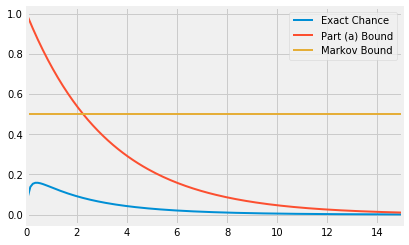

In [3]:
# Answer to 2b
r = np.arange(0.05, 15, 0.1) 

markov_bound = stats.gamma(r, scale = 1).mean()/(2*stats.gamma(r, scale = 1).mean())

part_a_bound = (2/np.exp(1))**r

exact = 1 - stats.gamma.cdf(2 * stats.gamma(r, scale = 1).mean(), r, scale = 1)

plt.plot(r, exact, lw=2, label='Exact Chance')
plt.plot(r, part_a_bound, lw=2, label='Part (a) Bound')
plt.plot(r, markov_bound, lw=2, label='Markov Bound')
plt.legend()
plt.xlim(0, 15);

**c)** For which values of $r$ is the bound in part (a) better than Markov's bound? Show the analytical calculation. Then use a code cell to find the numerical range and confirm that it is consistent with the graphs in (b).

for values : r >= 2.2588913532709296


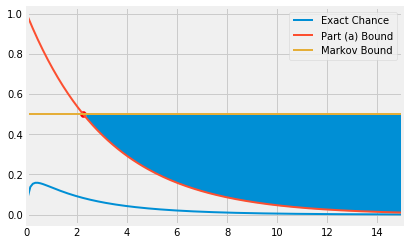

In [4]:
# Calculation for 2c
plt.plot(r, exact, lw=2, label='Exact Chance')
plt.plot(r, part_a_bound, lw=2, label='Part (a) Bound')
plt.plot(r, markov_bound, lw=2, label='Markov Bound')
plt.scatter(x = np.log(0.5)/np.log(2/np.exp(1)), y = 0.5, color = 'r')
plt.legend()
plt.xlim(0, 15);
print(r"for values : r >= {}".format(np.log(0.5)/np.log(2/np.exp(1))))
plt.fill_between(r , part_a_bound, markov_bound, where=part_a_bound <= markov_bound)
plt.show()

### 3. Waiting for a Random Coin to Land Heads ###
Let $X$ be a random proportion. Given $X=p$, let $T$ be the number of tosses till a $p$-coin lands heads.

**a)** Let $P(X = 1/10) = 1/4$, $P(X = 1/7) = 1/4$, and $P(X = 1/3) = 1/2$. Find $E(T)$.

**b)** Find $E(T)$ if $X$ has the beta $(r, s)$ density for some $r > 1$. Simplify all integrals and Gamma functions in your answer.

**c)** Let $X$ have the beta $(r, s)$ density. For fixed $k > 0$, find the posterior density of $X$ given $T = k$. Identify it as one of the famous ones and state its name and parameters.

### 4. Discrete and Continuous Random Selections ###
Fix a positive integer $n$, and let $p$ be strictly between 0 and 1.

Suppose Person A picks a number uniformly in the interval $(0, n)$. Let $X$ be the number Person A picks.

Suppose that independently of Person A, Person B picks an integer $Y$ according to the binomial $(n, p)$ distribution, for example by using `stats.binom.rvs(n, p, size=1)` or by tossing a $p$-coin $n$ times and recording the number of heads.

Find $P(X < Y)$.

### 5. Maximum Likelihood Estimate of the Exponential Rate ###
For $n > 1$, let $X_1, X_2, \ldots , X_n$ be i.i.d. exponential $(\lambda )$ variables. 

**a)** Let $\hat{\lambda}_n$ be the maximum likelihood estimate (MLE) of the parameter $\lambda$. Find $\hat{\lambda}_n$ in terms of the sample mean $\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$. The subscript $n$ in $\bar{X}_n$ is there to remind us that we have the average of $n$ values. It doesn't refer to the $n$th sampled value $X_n$.

**b)** This part is a simulation study in which you already know $\lambda$ and are examining how close your estimate comes to this known value. Take $\lambda = 0.25$. We have assigned it the name `lam` because `lambda` means something else in Python.

Repeat the following simulation 10,000 times.
- Generate a sample of 400 i.i.d. exponential (`lam`) variables. Use `stats.expon.rvs(scale = 1/lam, size=400)`.
- Calculate your MLE $\hat{\lambda}_{400}$ based on this sample.

Then draw the histogram and find the mean of your 10,000 MLEs. 

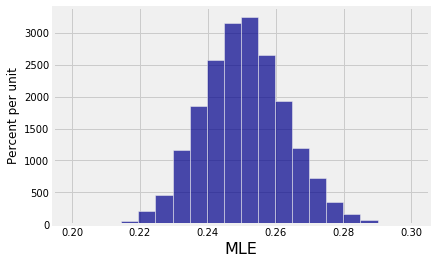

In [9]:
# Your answer to 5b
lam = 0.25

# Define a function that returns the MLE based on 
# one i.i.d. sample of size 400 
# from the exponential distribution with lambda = 0.25
def mle_from_one_sample():
    sample = stats.expon.rvs(scale = 1/lam, size = 400)
    return 1/np.mean(sample)

# Construct an array of 10,000 MLEs
mle_400 = make_array()
for i in range(10000):
    mle_400 = np.append(mle_400, mle_from_one_sample())
    
# Plot a histogram of the 10,000 MLEs
Table().with_column('MLE', mle_400).hist(bins=20)

In [10]:
# The mean of your 10000 mle's
np.mean(mle_400)

0.2506615309393798

**c)** Use facts about sums and linear transformations to find the distribution of $\bar{X}_n$ with little or no calculation. Recognize it as one of the famous ones and provide its name and parameters. Use it to find $E(\hat{\lambda}_n)$.

**d)** Is $\hat{\lambda}_n$ an unbiased estimate of $\lambda$? If it is biased, does it overestimate on average, or does it underestimate? Is it asymptotically unbiased? That is, does $E(\hat{\lambda}_n)$ converge to $\lambda$ as $n \to \infty$?

**e)** Your simulation in **b)** should show an approximately normal distribution for $\hat{\lambda}_n$. The Central Limit Theorem says the distribution of $\bar{X}_n$ should be approximately normal, but is $\hat{\lambda}_n$ a linear function of $\bar{X}_n$? If not, why is its distribution approximately normal?

[This one needs a little thought but no calculation. Think about what a smooth function looks like over a small interval in its domain, and then think about why small intervals are relevant here.]

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using an application. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general HW 11 Piazza thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Homework 11 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**


### **We will not grade assignments which do not have pages selected for each question.** 